In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# read data into a DataFrame
data = pd.read_csv('Advertising.csv', index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
print(data.dtypes)
print(data.shape)
print(data.describe())

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object
(200, 4)
               TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


In [4]:
# create X and y
feature_cols = ['TV', 'radio', 'newspaper']
X = data[feature_cols]
Y = data.sales


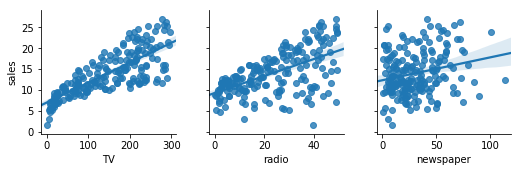

In [5]:
import seaborn as sns
sns.pairplot(data,x_vars=["TV","radio","newspaper"],y_vars="sales",kind='reg')

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)

X = scaler.transform(X)
print(X)

[[  9.69852266e-01   9.81522472e-01   1.77894547e+00]
 [ -1.19737623e+00   1.08280781e+00   6.69578760e-01]
 [ -1.51615499e+00   1.52846331e+00   1.78354865e+00]
 [  5.20496822e-02   1.21785493e+00   1.28640506e+00]
 [  3.94182198e-01  -8.41613655e-01   1.28180188e+00]
 [ -1.61540845e+00   1.73103399e+00   2.04592999e+00]
 [ -1.04557682e+00   6.43904671e-01  -3.24708413e-01]
 [ -3.13436589e-01  -2.47406325e-01  -8.72486994e-01]
 [ -1.61657614e+00  -1.42906863e+00  -1.36042422e+00]
 [  6.16042873e-01  -1.39530685e+00  -4.30581584e-01]
 [ -9.45155670e-01  -1.17923146e+00  -2.92486143e-01]
 [  7.90028350e-01   4.96973404e-02  -1.22232878e+00]
 [ -1.43908760e+00   7.99208859e-01   1.62704048e+00]
 [ -5.78501712e-01  -1.05768905e+00  -1.07502697e+00]
 [  6.66253447e-01   6.50657027e-01   7.11007392e-01]
 [  5.64664612e-01   1.65000572e+00   1.02862691e+00]
 [ -9.25304978e-01   9.00494200e-01   3.84117072e+00]
 [  1.56887609e+00   1.10306488e+00   1.16211917e+00]
 [ -9.08957349e-01  -1.86635

In [7]:
from sklearn.model_selection import train_test_split

#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=10)  


In [8]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,Y_train)

# print intercept and coefficients
print (lm.intercept_)
print (lm.coef_)


14.1220707366
[ 3.68520775  2.86599405 -0.08401343]


In [9]:
# pair the feature names with the coefficients
print(list(zip(feature_cols, lm.coef_)))

[('TV', 3.6852077530311766), ('radio', 2.8659940512184603), ('newspaper', -0.084013434084748734)]


In [10]:
X1=50
X2=50
X3=50
y_pred=3.41064158861+(0.04303172 *X1)+(0.19352212*X2)+(-0.00386729*X3)
print(y_pred)

15.04496908861


In [11]:
Y_pred=lm.predict(X_test)
print(Y_pred)

[ 18.15036181  12.95820252  17.96281871  23.48635189  20.63943359
  14.30052742  14.92156542  21.2976061   21.13034935  12.76544933
  23.86491138   7.28387816  12.2490586   19.1775      19.25023292
  13.52576881  19.58541788   9.39297179  21.07552783  20.88419301
  15.53857614  11.0705944   22.70668386  15.78683838  17.33994297
   8.22415652  12.02365058  12.75655772  21.69357443   8.07811401
  12.50491791  20.39390447   4.82359637   4.80401137  16.68053135
  15.67096463   6.82620647  17.67114344   9.04839361  13.58820984
  13.04172346  12.33122736  15.1813447   10.19394905  21.93462858
  10.875483    14.75565779  15.02894864   9.00263894  12.06902073
   8.45912507  13.83739383  22.79988682  17.53932396  14.52245343
   6.01712284  24.6277039   17.75036984  10.10209419   8.41135619]


In [12]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2score=r2_score(Y_test,Y_pred)
print(r2score)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)


0.856779067804
2.31820007508


In [13]:
print(min(Y))
print(max(Y))      

1.6
27.0


In [14]:
import statsmodels.formula.api as sm

# create a fitted model with all three features
lm_model = sm.ols(formula='sales ~ TV + radio + newspaper', data=data).fit()

# print the coefficients
print(lm_model.params)
print(lm_model.summary())


Intercept    2.938889
TV           0.045765
radio        0.188530
newspaper   -0.001037
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 02 Sep 2018   Prob (F-statistic):           1.58e-96
Time:                        12:10:11   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

In [58]:
Y_pred=lm_model.predict()

from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2score=r2_score(data['sales'],Y_pred)
print(r2score)

rmse=np.sqrt(mean_squared_error(data['sales'],Y_pred))
print(rmse)


0.897210638179
1.66857014072


In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
ind_df=data.iloc[:,:-1]

vif_df = pd.DataFrame()
vif_df["features"] = ind_df.columns
vif_df["VIF Factor"] = [vif(ind_df.values, i) for i in range(ind_df.shape[1])]
vif_df.round(2)

,features,VIF Factor
0,TV,2.49
1,radio,3.29
2,newspaper,3.06


In [15]:
import statsmodels.formula.api as sm

# create a fitted model with two features
lm_model = sm.ols(formula='sales ~ TV + radio ', data=data).fit()

# print the coefficients
print(lm_model.params)
print(lm_model.summary())

Intercept    2.921100
TV           0.045755
radio        0.187994
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sun, 02 Sep 2018   Prob (F-statistic):           4.83e-98
Time:                        12:10:32   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

                 TV     radio  newspaper
TV         1.000000  0.054809   0.056648
radio      0.054809  1.000000   0.354104
newspaper  0.056648  0.354104   1.000000


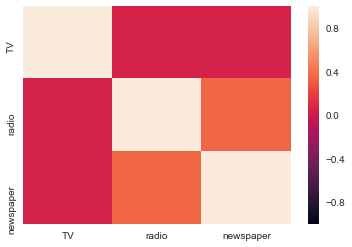

In [55]:
import seaborn as sns

corr_df=ind_df.corr(method="pearson")
print(corr_df)

sns.heatmap(corr_df,vmax=1.0,vmin=-1.0)

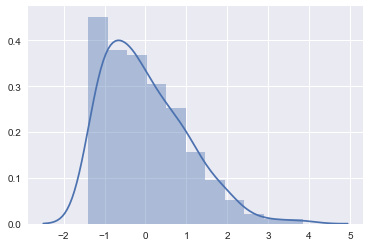

In [54]:
ind_df=data.iloc[:,:-1]
sns.set(color_codes=True)
#sns.distplot(ind_df['newspaper'])
sns.distplot(X[:,2])